In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Load merged_restaurant_data into df
df = pd.read_csv('data/merged_restaurant_data.csv')

# Descriptive Statistics

In [3]:
print("Numerical Summary:")
print(df[['rating', 'rating_count', 'cost_for_two']].describe())

Numerical Summary:
             rating  rating_count  cost_for_two
count  14393.000000  14393.000000  14393.000000
mean       3.783812    149.154728    372.446606
std        0.465240    356.140090    197.608786
min        1.100000      0.000000      5.000000
25%        3.500000     20.000000    230.000000
50%        3.800000     50.000000    300.000000
75%        4.100000    100.000000    500.000000
max        5.000000  14654.000000   2000.000000


In [4]:
print("\nCategorical Summary of Location:")
print(df['location'].drop_duplicates().count())
print("\nCategorical Summary of Cuisine:")
print(df['cuisines'].drop_duplicates().count())


Categorical Summary of Location:
106

Categorical Summary of Cuisine:
2367


In [5]:
print("\nCategorical Summary:")
print(df['location'].value_counts())


Categorical Summary:
location
Indiranagar        847
BTM                843
HSR                841
Whitefield         800
Electronic City    710
                  ... 
Langford Town        1
Kengeri              1
Sankey Road          1
Nagarbhavi           1
Peenya               1
Name: count, Length: 106, dtype: int64


In [6]:
# mean rating by location
print("\nTop mean ratings by location:")
print(df.groupby('location').filter(lambda x: len(x) >= 10).groupby('location')['rating'].mean().sort_values(ascending=False).head(5))

# mean rating by location with atleast 10 ratings
print("\nBottom mean ratings by location with atleast 10 ratings:")
print(df.groupby('location').filter(lambda x: len(x) >= 10).groupby('location')['rating'].mean().sort_values(ascending=True).head(5))


Top mean ratings by location:
location
Central Bangalore    4.184588
R.T. Nagar           4.081081
Koramangala          4.080645
Arekere              4.065559
Shantinagar          4.041667
Name: rating, dtype: float64

Bottom mean ratings by location with atleast 10 ratings:
location
Bommanahalli       3.293617
Rammurthy Nagar    3.314286
Magadi Road        3.418750
Wilson Garden      3.423333
South Bangalore    3.423529
Name: rating, dtype: float64


# Plots

In [7]:
plt.figure(figsize=(30, 10))

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

Text(0.5, 1.0, 'Rating Distribution')

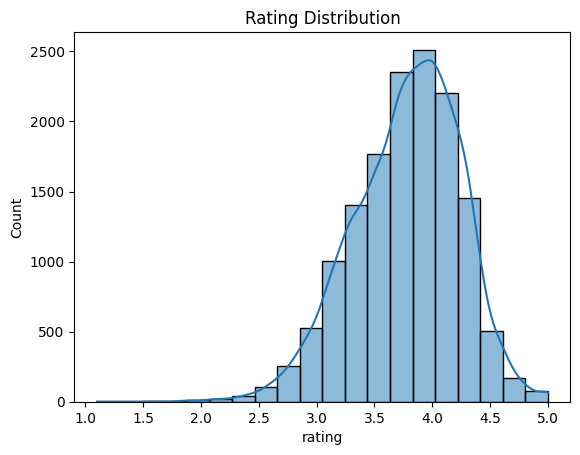

In [8]:
# Histograms
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Rating Distribution')

Text(0.5, 1.0, 'Cost for Two Distribution')

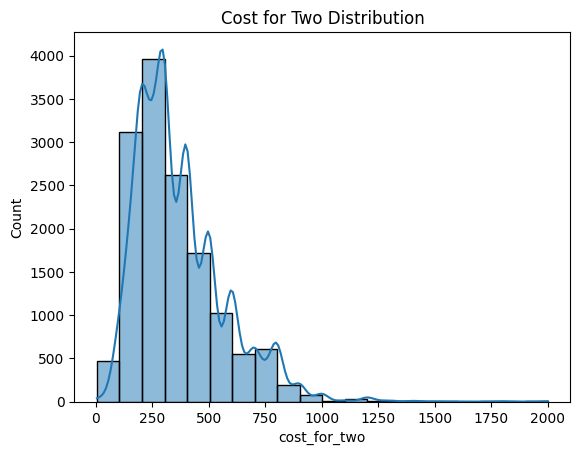

In [9]:
sns.histplot(df['cost_for_two'], bins=20, kde=True)
plt.title('Cost for Two Distribution')

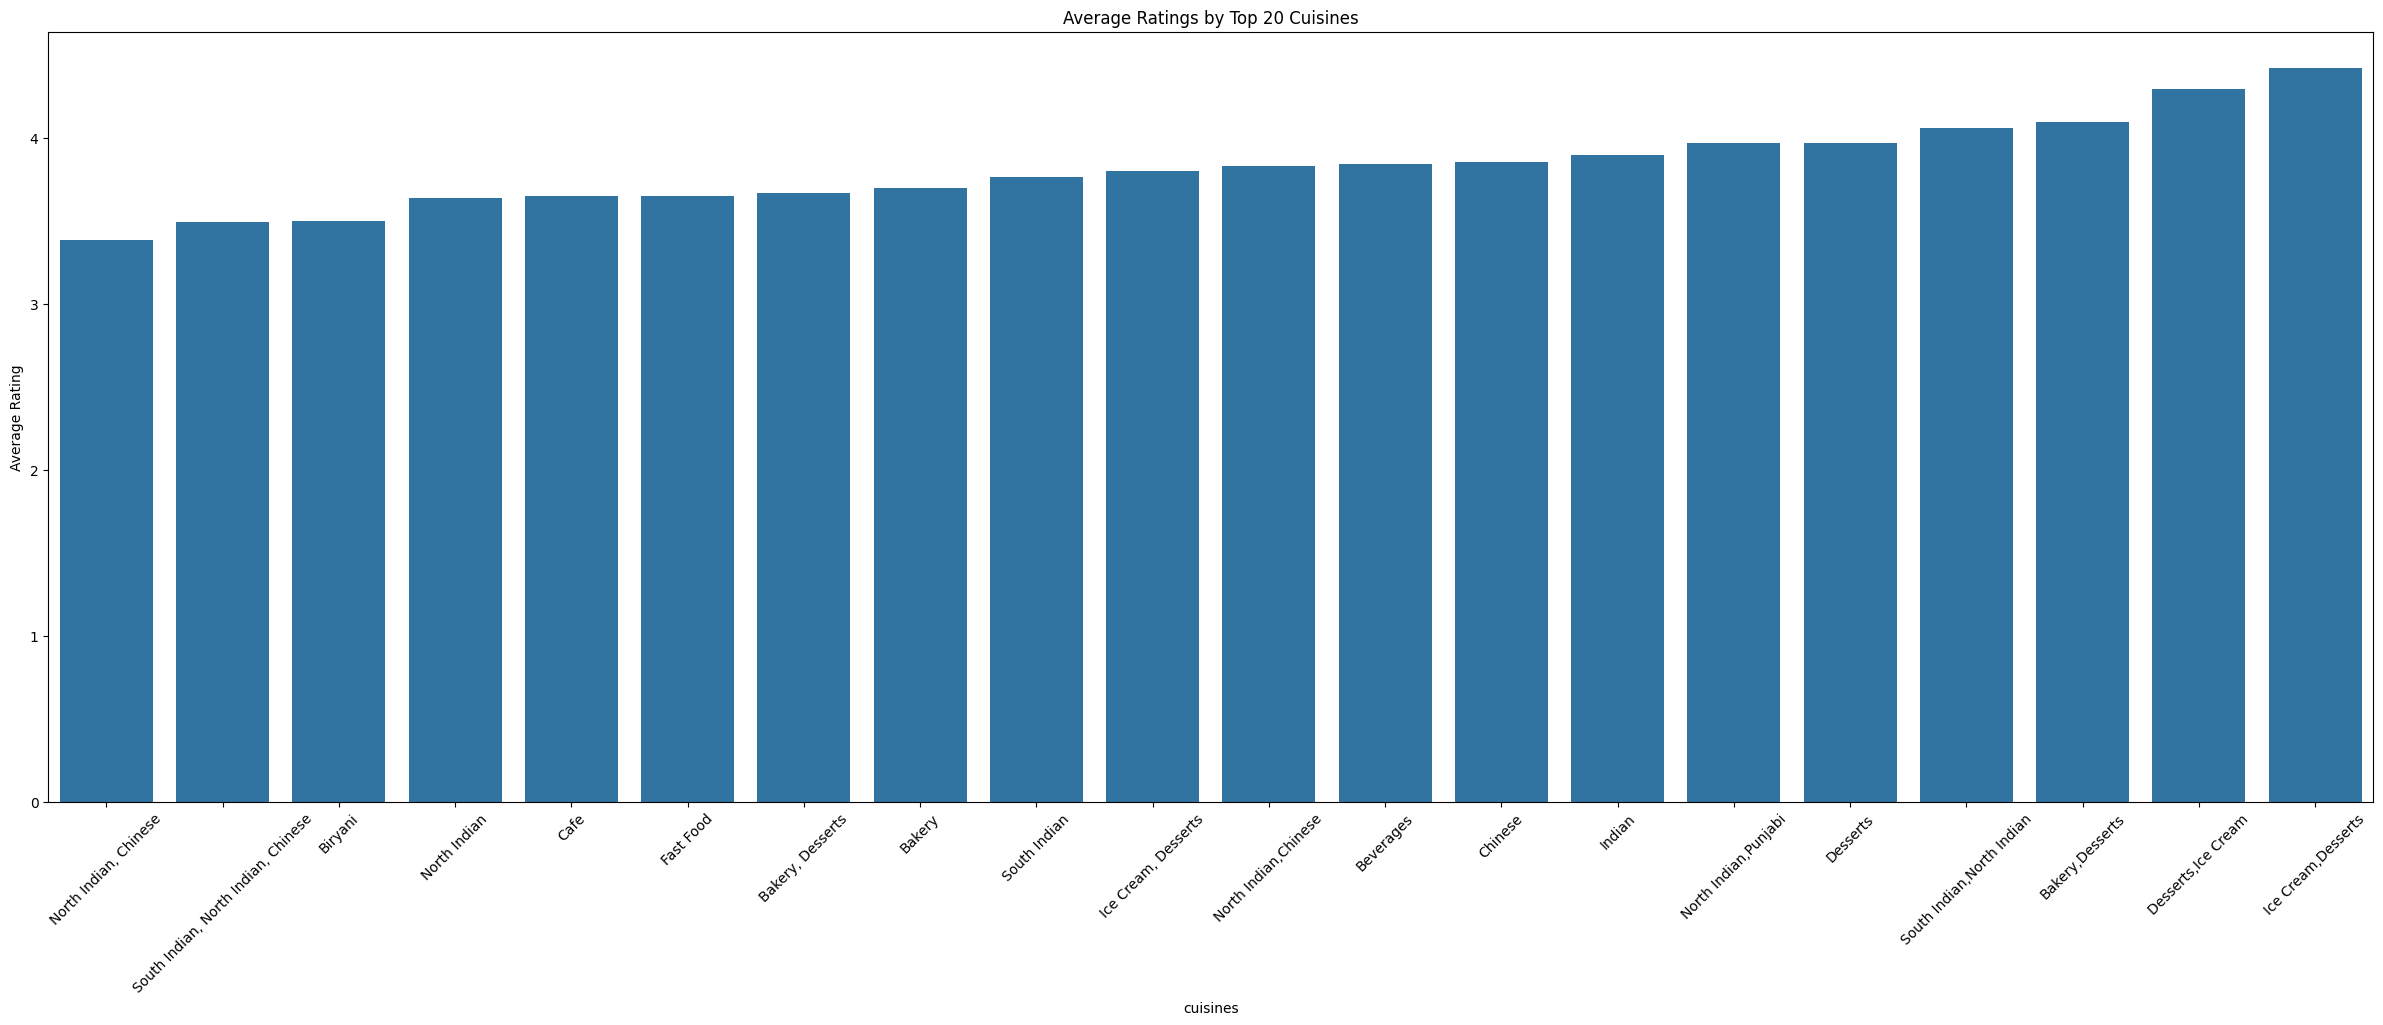

In [10]:
# Define top_20_cuisines
top_20_cuisines = df['cuisines'].value_counts().head(20).index

# Calculate mean ratings for top 20 cuisines
mean_ratings = df[df['cuisines'].isin(top_20_cuisines)].groupby('cuisines')['rating'].mean().loc[top_20_cuisines]

# Sort mean ratings
mean_ratings = mean_ratings.sort_values()

# Plot
plt.figure(figsize=(30, 10))
sns.barplot(x=mean_ratings.index, y=mean_ratings.values)
plt.title('Average Ratings by Top 20 Cuisines')
plt.xticks(rotation=45)
plt.ylabel('Average Rating')
plt.show()


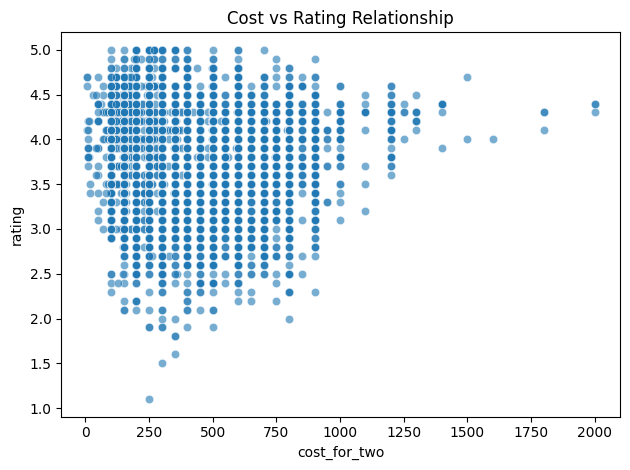

In [11]:
# Scatter Plot
sns.scatterplot(x='cost_for_two', y='rating', data=df, alpha=0.6)
plt.title('Cost vs Rating Relationship')

plt.tight_layout()
plt.show()

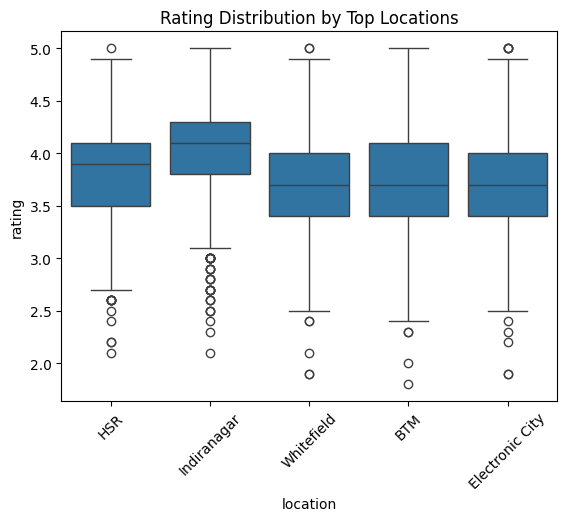

In [12]:
# Box Plots
sns.boxplot(x='location', y='rating', data=df[df['location'].isin(df['location'].value_counts().index[:5])])
plt.title('Rating Distribution by Top Locations')
plt.xticks(rotation=45)
plt.show()

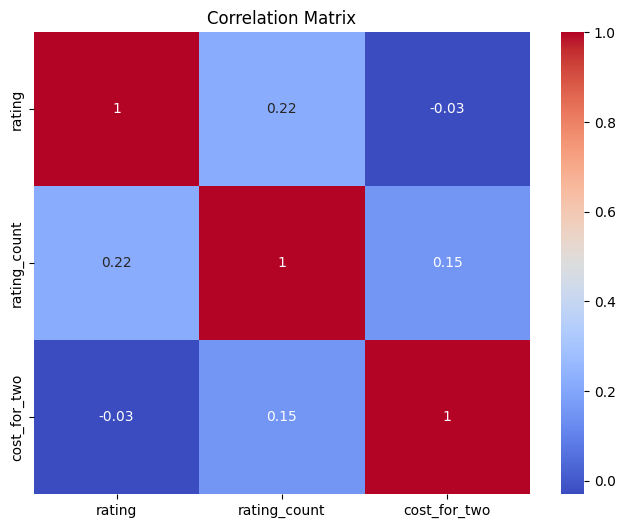

In [13]:
# 3. Correlation Analysis
corr_matrix = df[['rating', 'rating_count', 'cost_for_two']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
# 4. Statistical Tests
# Check normality
print("\nNormality Tests:")
for col in ['rating', 'rating_count', 'cost_for_two']:
    stat, p = stats.normaltest(df[col].dropna())
    print(f"{col}: p-value = {p:.4f}")


Normality Tests:
rating: p-value = 0.0000
rating_count: p-value = 0.0000
cost_for_two: p-value = 0.0000
